In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Netflix.csv')

## Preliminary Inspection of the given data

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# Since release_year is the only column with int type
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
# finding how many null values are there in each row
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Data Cleaning

In [7]:
# while exploring the data, found out that the 3 null values of duration column are present in same row of rating col
# hence replacing the values for the three rows between those two columns
df.iat[5541, 9] = df.iat[5541, 8] 
df.iat[5794, 9] = df.iat[5794, 8] 
df.iat[5813, 9] = df.iat[5813, 8]

df.iat[5541, 8] = np.nan
df.iat[5794, 8] = np.nan
df.iat[5813, 8] = np.nan

### **I am Trying to fill the null values of the country based on  director.**
<br>
My apporach is:
<br>
<br>
1. Exploding the director column to get individual row for each director in the list.
<br>
2. Exploding the country column to get individual row for each country in the list.
<br>
3. Finding mode of country for each director.
<br>
4. Replace the null of country based on the mode of country that was found in previous step.
<br>
<br>

**Note:**  Exploding here means, transform each element of a list-like to a separate row.

In [8]:
# exploding directors to get seperate row for each director for the same movie
df['director'] = df['director'].str.split(",")
explode_dir = df.explode('director')
explode_dir['director'] = explode_dir['director'].str.strip()

In [9]:
explode_dir.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [10]:
explode_dir['null dir'] = explode_dir['director'].isna()
explode_dir['null country'] = explode_dir['country'].isna()

In [11]:
explode_dir.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,null dir,null country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",False,False
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",True,False


In [12]:
# exploding directors to get seperate row for each director for the same movie
explode_dir['country'] = explode_dir['country'].str.split(",")
explode_country = explode_dir.explode('country')
explode_country['country'] = explode_country['country'].str.strip()

In [13]:
explode_country.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,null dir,null country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",False,False
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",True,False


In [14]:
# Getting a dataframe that has zero null directors and zero null countries
dc = explode_country[(~explode_country['director'].isna()) & (~explode_country['country'].isna())][['director', 'country']]


In [15]:
dc

,director,country
0,Kirsten Johnson,United States
7,Haile Gerima,United States
7,Haile Gerima,Ghana
7,Haile Gerima,Burkina Faso
7,Haile Gerima,United Kingdom
...,...,...
8801,Majid Al Ansari,Jordan
8802,David Fincher,United States
8804,Ruben Fleischer,United States
8805,Peter Hewitt,United States


In [16]:
most_common_country = dc.groupby('director')['country'].apply(lambda x: x.value_counts().idxmax()).reset_index()

In [17]:
most_common_country

,director,country
0,A. L. Vijay,India
1,A. Raajdheep,India
2,A. Salaam,India
3,A.R. Murugadoss,India
4,Aadish Keluskar,India
...,...,...
4734,Éric Warin,France
4735,Ísold Uggadóttir,Iceland
4736,Óskar Thór Axelsson,Iceland
4737,Ömer Faruk Sorak,Turkey


In [18]:
# adding the country from the most_common_country dataframe which contains the most frequent country of a director,
# in a seperate column
merge_df = pd.merge(explode_country, most_common_country, on = 'director', how = 'left')


In [19]:
# filling the null values of the original country(country_x) column from country_y column from the merging
merge_df['country_x'] = merge_df.apply(lambda row: row['country_y'] if pd.isnull(row['country_x']) else row['country_x'], axis = 1)

In [20]:
# dropping the country_y column since it is no longer needed and renaming the country_x column to 'country' 
# as preset initially! 
merge_df = merge_df.drop(['country_y'], axis=1).rename(columns={'country_x': 'country'})

In [21]:
# initially this director's country was not filled
explode_country[explode_country['director'] == 'A.R. Murugadoss']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,null dir,null country
4049,s4050,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",NaN,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,False,True
4681,s4682,Movie,Spyder,A.R. Murugadoss,"Mahesh Babu, Rakul Preet Singh, S.J. Surya, Bh...",India,"August 28, 2018",2017,TV-14,140 min,"Action & Adventure, International Movies",When an Intelligence Bureau officer’s phone-ta...,False,False


In [22]:
# After filling the null values, we can see that the director's name has been filled.
merge_df[merge_df['director'] == 'A.R. Murugadoss']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,null dir,null country
5274,s4050,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,False,True
6056,s4682,Movie,Spyder,A.R. Murugadoss,"Mahesh Babu, Rakul Preet Singh, S.J. Surya, Bh...",India,"August 28, 2018",2017,TV-14,140 min,"Action & Adventure, International Movies",When an Intelligence Bureau officer’s phone-ta...,False,False


In [23]:
# Checking how many values in country column has been filled. (Ans: 180)
len(merge_df[(merge_df['null country'] == True) & (~merge_df['country'].isna())].groupby('show_id'))

171

In [24]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11917 entries, 0 to 11916
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       11917 non-null  object
 1   type          11917 non-null  object
 2   title         11917 non-null  object
 3   director      8947 non-null   object
 4   cast          10725 non-null  object
 5   country       11216 non-null  object
 6   date_added    11907 non-null  object
 7   release_year  11917 non-null  int64 
 8   rating        11910 non-null  object
 9   duration      11917 non-null  object
 10  listed_in     11917 non-null  object
 11  description   11917 non-null  object
 12  null dir      11917 non-null  bool  
 13  null country  11917 non-null  bool  
dtypes: bool(2), int64(1), object(11)
memory usage: 1.2+ MB


In [25]:
# changing date_added type to pandas datetime object
merge_df['date_added'] = pd.to_datetime(merge_df['date_added'] )

In [26]:
merge_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,null dir,null country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",False,False
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",True,False


In [27]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11917 entries, 0 to 11916
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       11917 non-null  object        
 1   type          11917 non-null  object        
 2   title         11917 non-null  object        
 3   director      8947 non-null   object        
 4   cast          10725 non-null  object        
 5   country       11216 non-null  object        
 6   date_added    11907 non-null  datetime64[ns]
 7   release_year  11917 non-null  int64         
 8   rating        11910 non-null  object        
 9   duration      11917 non-null  object        
 10  listed_in     11917 non-null  object        
 11  description   11917 non-null  object        
 12  null dir      11917 non-null  bool          
 13  null country  11917 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(10)
memory usage: 1.2+ MB


# Filling null values for the columns

In [28]:
# getting the count of null values for each column
merge_df.isna().sum()

show_id            0
type               0
title              0
director        2970
cast            1192
country          701
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
null dir           0
null country       0
dtype: int64

## Column 4: Directors

In [29]:
# filling the null directors to "others", considering the context
merge_df['director'].replace(np.nan, 'Others', inplace = True)
merge_df['director'].isna().sum()

0

## Column 5: Cast

In [30]:
# filling the null values with "others", considering the context
merge_df['cast'].replace(np.nan, 'Others', inplace = True)
merge_df['cast'].isna().sum()

0

## Column 6: Country

In [31]:
# We have filled the null values of 171 rows with the mode of country of each director.
# see above for the results
# Now I am going to fill the remaining null values with "Others", considering the context.
merge_df['country'].replace(np.nan, 'Others', inplace = True)
merge_df['country'].isna().sum()

0

## Column 7: date_added

In [32]:
# filling the null values of date_added column with mode of that column
merge_df['date_added'].fillna(merge_df['date_added'].mode()[0],inplace = True )
merge_df['date_added'].isna().sum()

0

## Column 8: rating

In [33]:
merge_df[merge_df['type'] == 'Movie']['rating'].mode()

0    TV-MA
Name: rating, dtype: object

In [34]:
merge_df[merge_df['type'] == 'TV Show']['rating'].mode()

0    TV-MA
Name: rating, dtype: object

In [35]:
# Since the mode of rating of both types are TV-MA, we can fill the null values of rating with this
merge_df['rating'].fillna("TV-MA", inplace=True)
merge_df['rating'].isna().sum()

0

## Column 9: duration

In [36]:
# The null values are filled in the start itself
merge_df['duration'].isna().sum()

0

In [37]:
# since the movie description is not important for our analyisis, we can drop it
merge_df.drop(['description', 'null dir', 'null country'], axis = 1,inplace = True)

In [38]:
merge_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [39]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11917 entries, 0 to 11916
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       11917 non-null  object        
 1   type          11917 non-null  object        
 2   title         11917 non-null  object        
 3   director      11917 non-null  object        
 4   cast          11917 non-null  object        
 5   country       11917 non-null  object        
 6   date_added    11917 non-null  datetime64[ns]
 7   release_year  11917 non-null  int64         
 8   rating        11917 non-null  object        
 9   duration      11917 non-null  object        
 10  listed_in     11917 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1.1+ MB


In [40]:
merge_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [41]:
# exploding cast to get seperate row for each actor for the same movie
merge_df['cast'] = merge_df['cast'].str.split(",")
explode_cast = merge_df.explode('cast')
explode_cast['cast'] = explode_cast['cast'].str.strip()

In [42]:
# exploding listed_in to get seperate row for each genre for the same movie
explode_cast['listed_in'] = explode_cast['listed_in'].str.split(",")
explode_listedin = explode_cast.explode('listed_in')
explode_listedin['listed_in'] = explode_listedin['listed_in'].str.strip()

In [43]:
explode_listedin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 11916
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      202065 non-null  object        
 4   cast          202065 non-null  object        
 5   country       202065 non-null  object        
 6   date_added    202065 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        202065 non-null  object        
 9   duration      202065 non-null  object        
 10  listed_in     202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 18.5+ MB


# Data Visualization

## 1. Popularity of column: Type

In [44]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

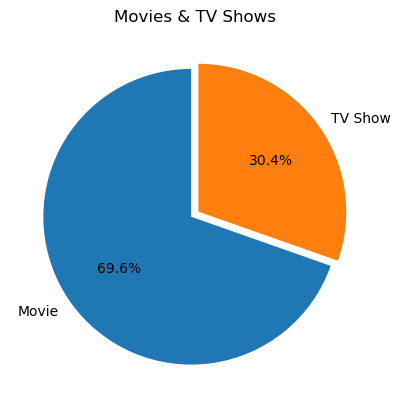

In [45]:
plt.pie(df['type'].value_counts(), startangle=90, labels= ['Movie', 'TV Show'], explode = [0.03, 0.03], autopct='%1.1f%%')
plt.title("Movies & TV Shows")
plt.show()

**Observation**: 69.6% of the entries are movies are 30.4% of the movies are TV Shows 
<br>
    **Insight**: Movies are more popular than TV Shows

## 2. Popularity of column: Rating

Short description about the ratings
- Movies
<br>
     - R : Restricted - Under 17
     <br>
     - PG-13 : Parents Strongly Cautioned
     <br>
     - PG : Parental Guidance Suggested
     <br>
     - NR : Not Rated
     <br>
     - G : General Audiences
     <br>
     - NC-17 : Adutls only
     <br>
     - UR : Unrated
<br>
<br>
- TV shows
<br>
     - TV-MA : Mature audience only
     <br>
     - TV-14 : Parents strongly cautioned
     <br>
     - TV-PG : Parental guidance suggested
     <br>
     - TV-Y7 : Directed to Older Children
     <br>
     - TV-Y : All Children
     <br>
     - TV-G : General Audience
     <br>
     - TV-Y7-FV : Fantasy violence

In [46]:
# getting unique show_id and their rating

rating = explode_listedin[['show_id', 'rating']].drop_duplicates().reset_index(drop = True)
rating

,show_id,rating
0,s1,PG-13
1,s2,TV-MA
2,s3,TV-MA
3,s4,TV-MA
4,s5,TV-MA
...,...,...
8802,s8803,R
8803,s8804,TV-Y7
8804,s8805,R
8805,s8806,PG


In [47]:
# top 5 ratings

top_5_rating = rating['rating'].value_counts()[:6].reset_index()

In [48]:
top_5_rating.rename(columns = {'index':'rating', 'rating': 'count'}, inplace = True)

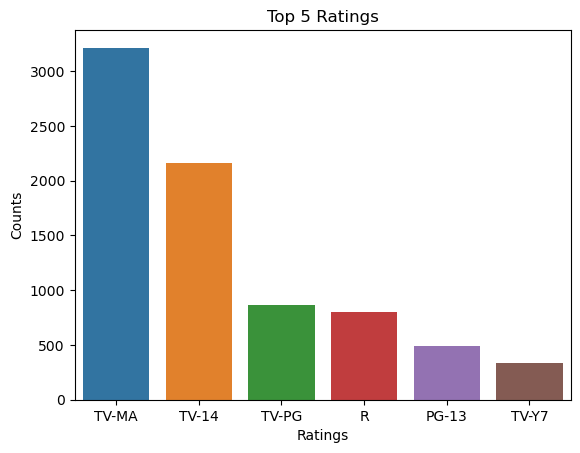

In [49]:
sns.barplot(data = top_5_rating, x=top_5_rating['rating'], y=top_5_rating['count'])
plt.title('Top 5 Ratings')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.show()

**Observation**: **TV-MA** is most popular, followed by **TV-14** and **TV-PG**
<br>
**Insight**: TV-MA are more popular followed by shows for kids of age 14 and above


## 3. Popularity of column: Country

In [50]:
# dropping 'Others' since we don't want to analyse 
country = explode_listedin[explode_listedin['country'] != "Others"][['show_id', 'country', 'type']].drop_duplicates().reset_index(drop = True)
country


,show_id,country,type
0,s1,United States,Movie
1,s2,South Africa,TV Show
2,s3,France,TV Show
3,s5,India,TV Show
4,s6,United States,TV Show
...,...,...,...
10185,s8802,Jordan,Movie
10186,s8803,United States,Movie
10187,s8805,United States,Movie
10188,s8806,United States,Movie


In [51]:
country['country'].value_counts()

United States     3728
India             1116
United Kingdom     810
Canada             445
France             396
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: country, Length: 123, dtype: int64

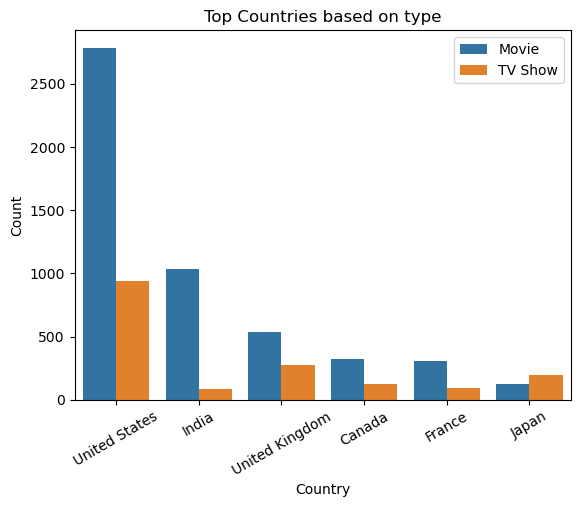

In [52]:
sns.countplot(data = country, x='country', hue = 'type', order=country['country'].value_counts().index[:6])
plt.xticks(rotation = 30)
plt.title('Top Countries based on type')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(loc = 'upper right')
plt.show()

**INSIGHTS:**
<br>
1. It is observed that both TV Shows and Movies are populare in the United States, India stands second in the list, followed by United kingdom and Canada.
<br>
2. In India movies are much more popular than TV shows.
<br>
3. In South Korea and Japan, TV shows are more popular compared to movies.


## 4. Popularity of Column: Directors

In [53]:
# getting top directors based on type
directors_type = explode_listedin[explode_listedin['director'] != "Others"][['show_id', 'director', 'type']].drop_duplicates().reset_index(drop = True)
directors_movies = directors_type[directors_type['type']=='Movie']
directors_tvshow = directors_type[directors_type['type']=='TV Show']


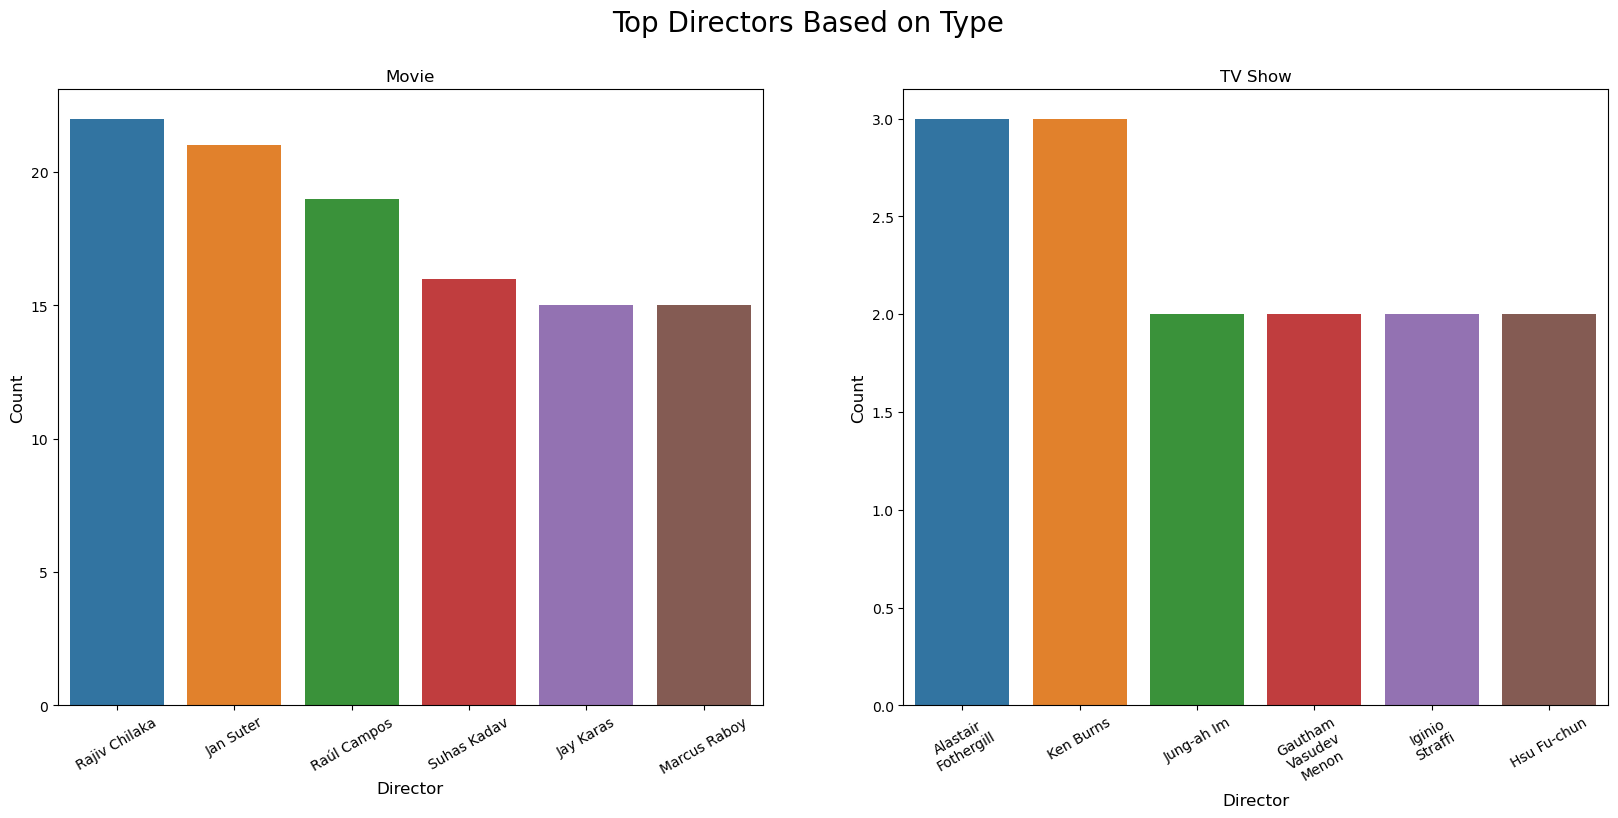

In [54]:
import textwrap
plt.figure(figsize=(20,8)).suptitle('Top Directors Based on Type', fontsize = 20)

# Top Directors based on type: Movie
plt.subplot(1,2,1)
sns.countplot(data = directors_movies, x='director', order=directors_movies['director'].value_counts().index[:6])
plt.xticks(rotation = 30)
plt.title('Movie', fontsize = 12)
plt.xlabel('Director', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# Top Directors based on type: TV Shows
plt.subplot(1,2,2)
ax = sns.countplot(data = directors_tvshow, x='director', order=directors_tvshow['director'].value_counts().index[:6])
plt.title('TV Show', fontsize = 12)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
plt.xlabel('Director', fontsize = 12)
ax.set_xticklabels(labels)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 30)

plt.show()

In [55]:
merge_df[merge_df['director']=='Rajiv Chilaka'][['type', 'title', 'rating']]

,type,title,rating
535,Movie,Chhota Bheem - Neeli Pahaadi,TV-Y7
536,Movie,Chhota Bheem & Ganesh,TV-Y7
537,Movie,Chhota Bheem & Krishna: Mayanagari,TV-Y7
538,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,TV-Y7
539,Movie,Chhota Bheem And The Broken Amulet,TV-Y7
540,Movie,Chhota Bheem And The Crown of Valhalla,TV-Y7
541,Movie,Chhota Bheem and the Incan Adventure,TV-Y7
542,Movie,Chhota Bheem and The ShiNobi Secret,TV-Y7
543,Movie,Chhota Bheem Aur Hanuman,TV-Y7
544,Movie,Chhota Bheem aur Krishna,TV-Y7


**Observation:** Rajiv Chilaka's Chotta Bheem kids movie series is more popular in India.

In [56]:
# getting top directors based on top 3 countries
# 1. United States
# 2. India
# 3. Canada
# 4. France

directors_country = explode_listedin[explode_listedin['director'] != "Others"][['show_id', 'director', 'country']].drop_duplicates().reset_index(drop = True)
directors_US = directors_country[directors_country['country']=='United States']
directors_India = directors_country[directors_country['country']=='India']
directors_Canada = directors_country[directors_country['country']=='Canada']
directors_France = directors_country[directors_country['country']=='France']


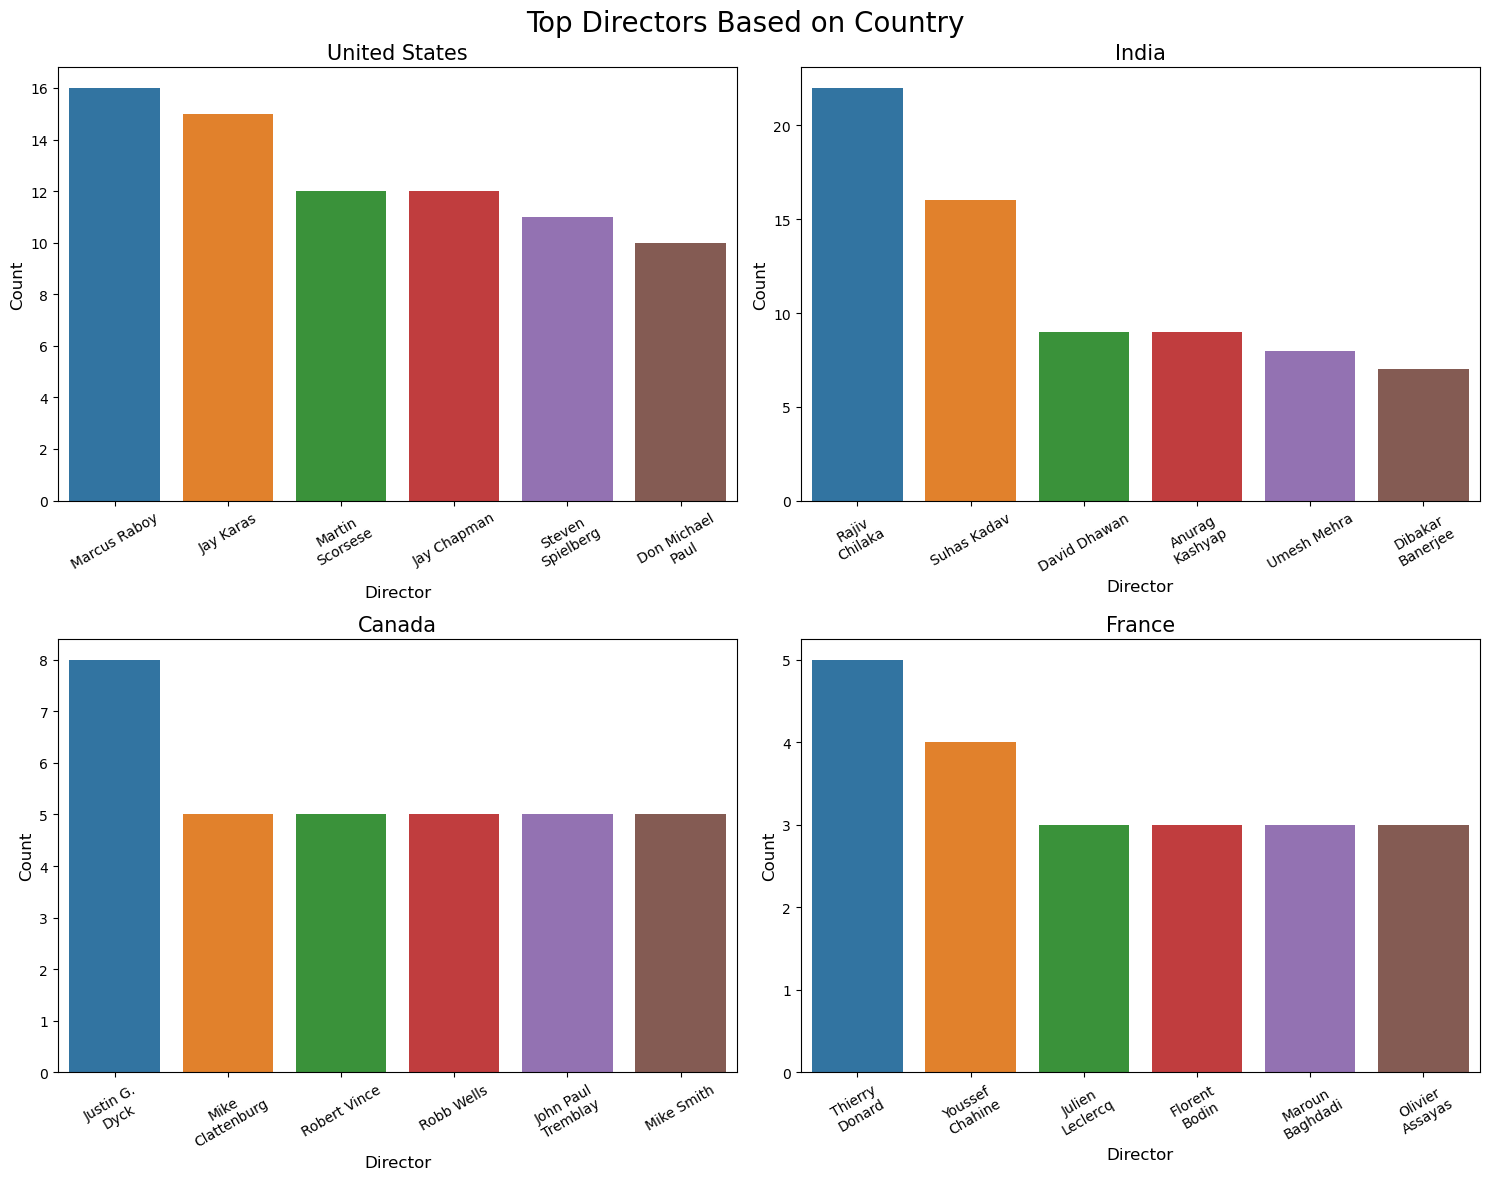

In [57]:
plt.figure(figsize=(15,12)).suptitle('Top Directors Based on Country', fontsize = 20)

# Top Directors based on Country: United States
plt.subplot(2,2,1)
ax = sns.countplot(data = directors_US, x='director', order=directors_US['director'].value_counts().index[:6])
plt.title('United States', fontsize = 15)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
plt.xlabel('Director', fontsize = 12)
ax.set_xticklabels(labels)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 30)

# Top Directors based on Country: India
plt.subplot(2,2,2)
ax = sns.countplot(data = directors_India, x='director', order=directors_India['director'].value_counts().index[:6])
plt.title('India', fontsize = 15)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
plt.xlabel('Director', fontsize = 12)
ax.set_xticklabels(labels)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 30)

# Top Directors based on Country: Canada
plt.subplot(2,2,3)
ax = sns.countplot(data = directors_Canada, x='director', order=directors_Canada['director'].value_counts().index[:6])
plt.title('Canada', fontsize = 15)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
plt.xlabel('Director', fontsize = 12)
ax.set_xticklabels(labels)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 30)

# Top Directors based on Country: France
plt.subplot(2,2,4)
ax = sns.countplot(data = directors_France, x='director', order=directors_France['director'].value_counts().index[:6])
plt.title('France', fontsize = 15)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
plt.xlabel('Director', fontsize = 12)
ax.set_xticklabels(labels)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 30)

plt.tight_layout()
plt.show()

**Observation:** 
<br>
1. The directors producing popular Movies are
    - Rajiv Chilaka
    - Jan Suter
    - Raul Campos
    <br>
2. The directos producing popular TV Shows are
    - Alastair Fothergill
    - Ken Burns
    - Jung-ah Im
    <br>
3. Rajiv Chilaka's Chotta Bheem movie series are quite popular among kids in India.

## 5. Popularity of column: Cast

In [58]:
cast_type = explode_listedin[explode_listedin['cast'] != "Others"][['show_id', 'cast', 'type']].drop_duplicates().reset_index(drop = True)
cast_movies = cast_type[cast_type['type']=='Movie']
cast_tvshows = cast_type[cast_type['type']=='TV Show']


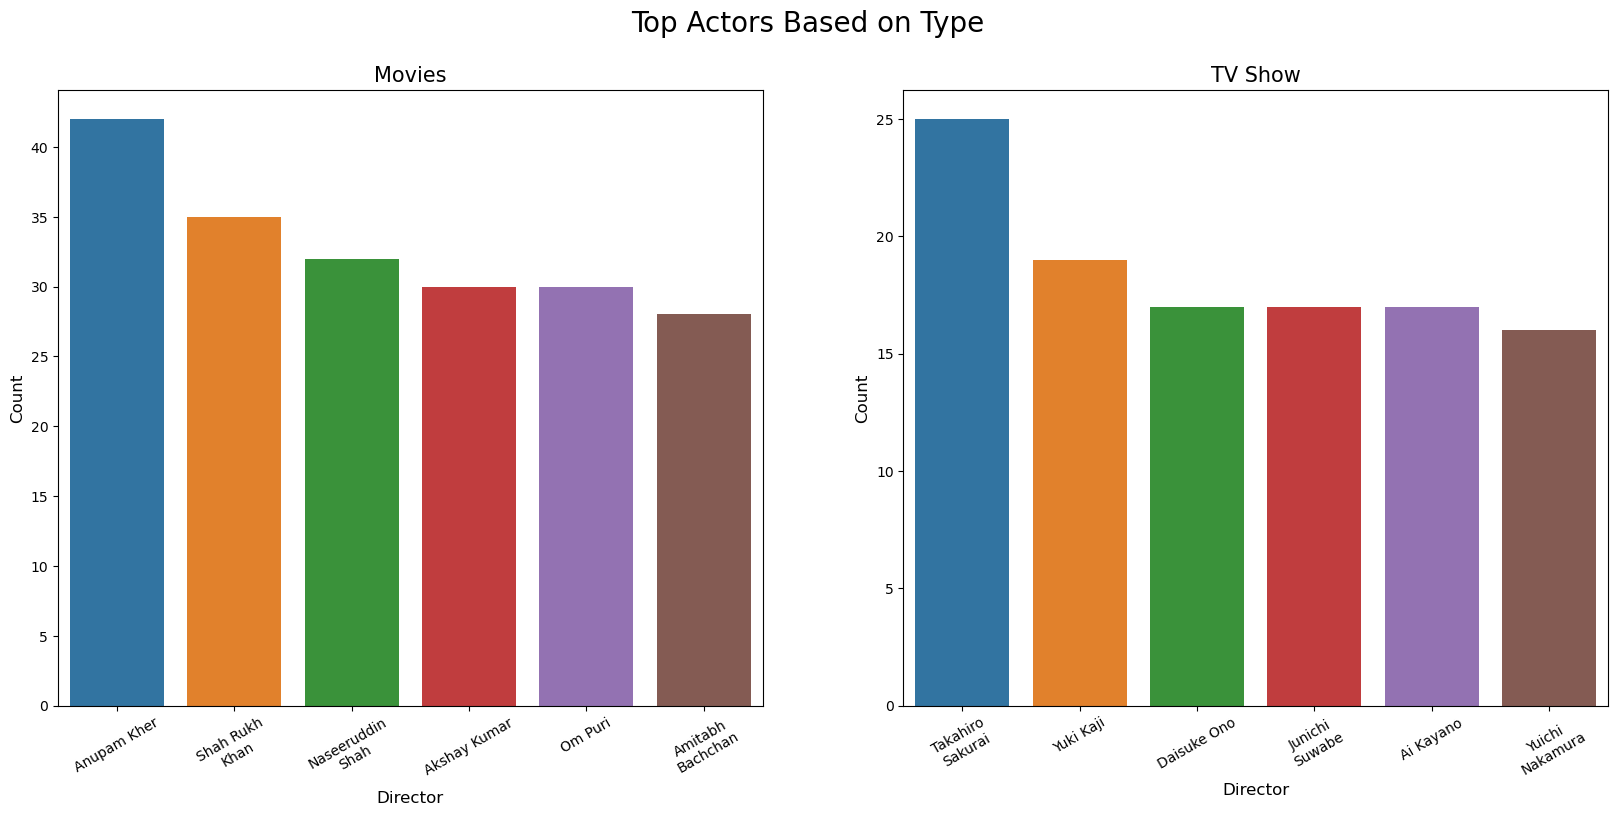

In [59]:
plt.figure(figsize=(20,8)).suptitle('Top Actors Based on Type', fontsize = 20)

# Top Actors based on type: Movie
plt.subplot(1,2,1)
ax = sns.countplot(data = cast_movies, x='cast', order=cast_movies['cast'].value_counts().index[:6])
plt.title('Movies', fontsize = 15)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
plt.xlabel('Director', fontsize = 12)
ax.set_xticklabels(labels)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 30)

# Top Actors based on type: TV Shows
plt.subplot(1,2,2)
ax = sns.countplot(data = cast_tvshows, x='cast', order=cast_tvshows['cast'].value_counts().index[:6])
plt.title('TV Show', fontsize = 15)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
plt.xlabel('Director', fontsize = 12)
ax.set_xticklabels(labels)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 30)

plt.show()

In [60]:
cast_tvshows['cast'].value_counts()

Takahiro Sakurai         25
Yuki Kaji                19
Daisuke Ono              17
Junichi Suwabe           17
Ai Kayano                17
                         ..
Bhumibhat Thavornsiri     1
Thanongsak Suphakan       1
Kanjanaporn Plodpai       1
Boonsong Nakphoo          1
Hina Khawaja Bayat        1
Name: cast, Length: 14863, dtype: int64

**Observations:**
<br>
1. Top actors based on Movies.
    - Anupam Kher
    - Shah Rukh Khan
    - Naseeruddin Shah
<br>
2. Top actors based on TV Shows.
    - Takahiro Sakurai
    - Yuki Kaji
    - Daisuke Ono 

In [61]:
# getting top directors based on top 3 countries
# 1. United States
# 2. India
# 3. Canada
# 4. France

cast_country = explode_listedin[explode_listedin['cast'] != "Others"][['show_id', 'cast', 'country']].drop_duplicates().reset_index(drop = True)
cast_US = cast_country[cast_country['country']=='United States']
cast_India = cast_country[cast_country['country']=='India']
cast_Canada = cast_country[cast_country['country']=='Canada']
cast_France = cast_country[cast_country['country']=='France']


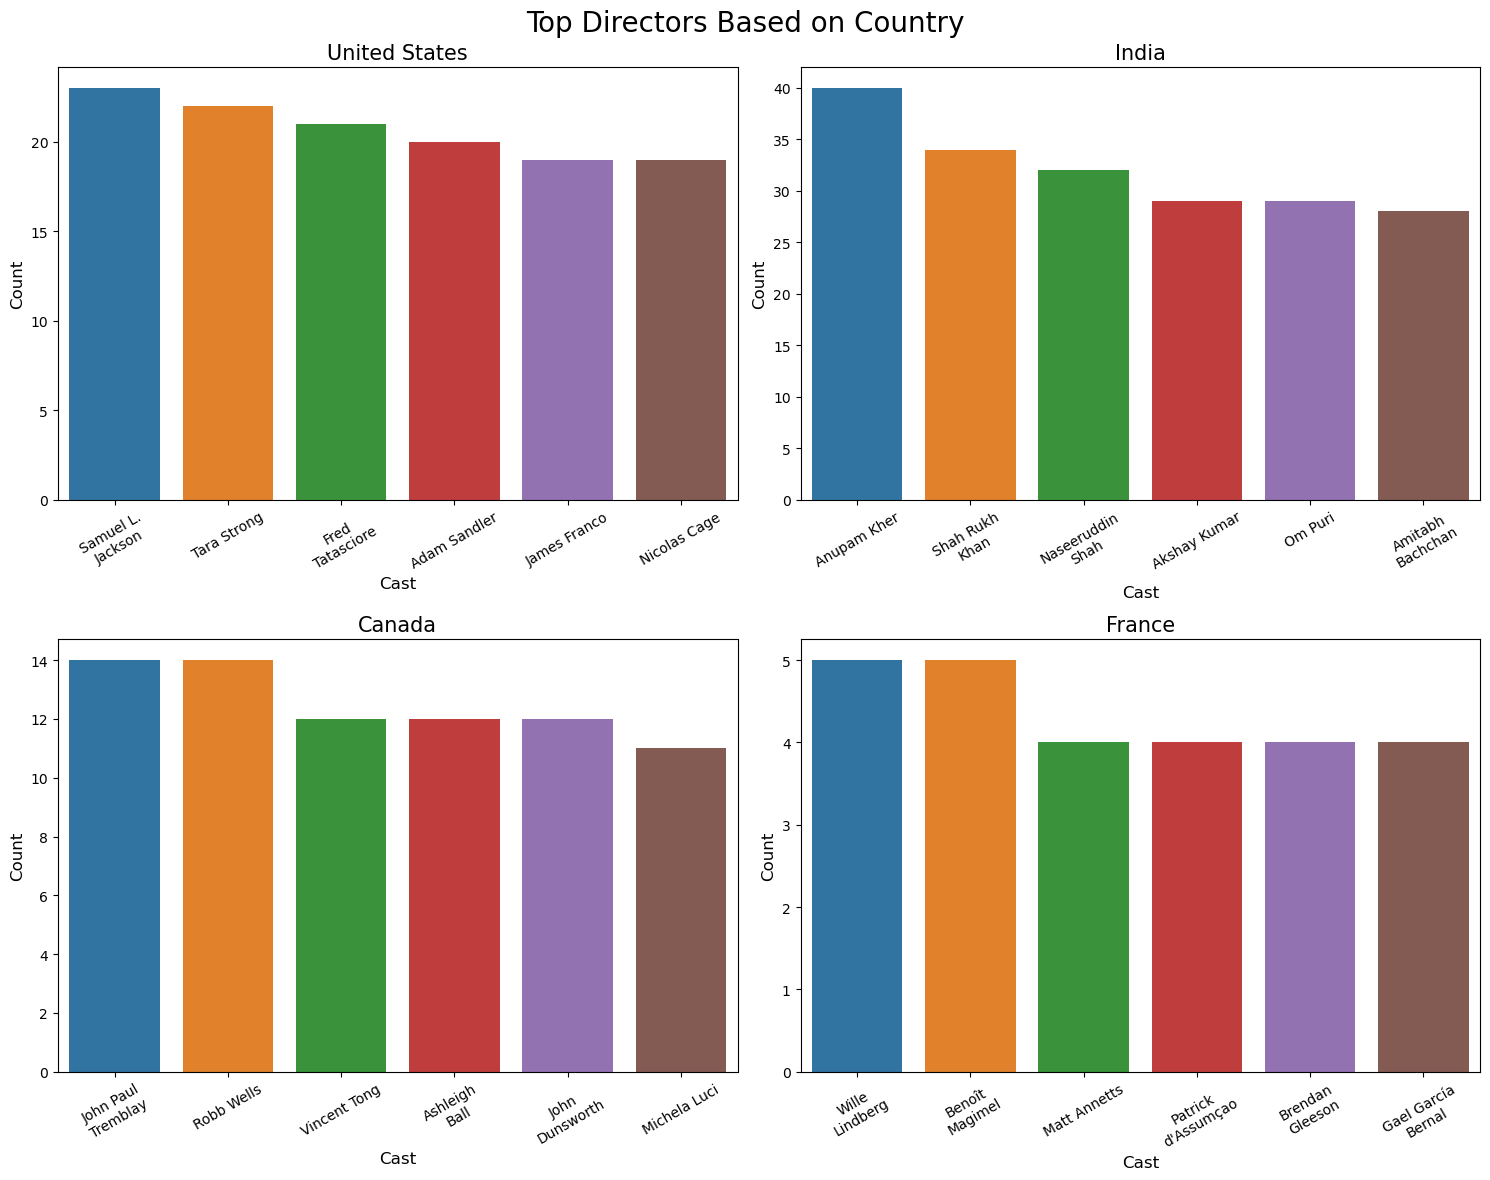

In [62]:
plt.figure(figsize=(15,12)).suptitle('Top Directors Based on Country', fontsize = 20)

# Top cast based on Country: United States
plt.subplot(2,2,1)
ax = sns.countplot(data = cast_US, x='cast', order=cast_US['cast'].value_counts().index[:6])
plt.title('United States', fontsize = 15)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
plt.xlabel('Cast', fontsize = 12)
ax.set_xticklabels(labels)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 30)

# Top cast based on Country: India
plt.subplot(2,2,2)
ax = sns.countplot(data = cast_India, x='cast', order=cast_India['cast'].value_counts().index[:6])
plt.title('India', fontsize = 15)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
plt.xlabel('Cast', fontsize = 12)
ax.set_xticklabels(labels)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 30)

# Top cast based on Country: Canada
plt.subplot(2,2,3)
ax = sns.countplot(data = cast_Canada, x='cast', order=cast_Canada['cast'].value_counts().index[:6])
plt.title('Canada', fontsize = 15)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
plt.xlabel('Cast', fontsize = 12)
ax.set_xticklabels(labels)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 30)

# Top cast based on Country: France
plt.subplot(2,2,4)
ax = sns.countplot(data = cast_France, x='cast', order=cast_France['cast'].value_counts().index[:6])
plt.title('France', fontsize = 15)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
plt.xlabel('Cast', fontsize = 12)
ax.set_xticklabels(labels)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 30)

plt.tight_layout()
plt.show()

**Observations:**
<br>
1. Top actors based on Movies.
    - Anupam Kher
    - Shah Rukh Khan
    - Naseeruddin Shah
<br>
2. Top actors based on TV Shows.
    - Takahiro Sakurai
    - Yuki Kaji
    - Daisuke Ono 

**Observation:** It is observed that Takahiro Sakurai, Yuki Kaji, Daisuke Ono have been casted many times in popular TV shows.

## 6. Popularity of column: Released_year

In [63]:
released_year = explode_listedin[explode_listedin['release_year'] != "Others"][['show_id','type', 'release_year']].drop_duplicates().reset_index(drop = True)
ry_movies = released_year[released_year['type']=='Movie']['release_year'].value_counts().reset_index()[:10]
ry_tvshows = released_year[released_year['type']=='TV Show']['release_year'].value_counts().reset_index()[:10]


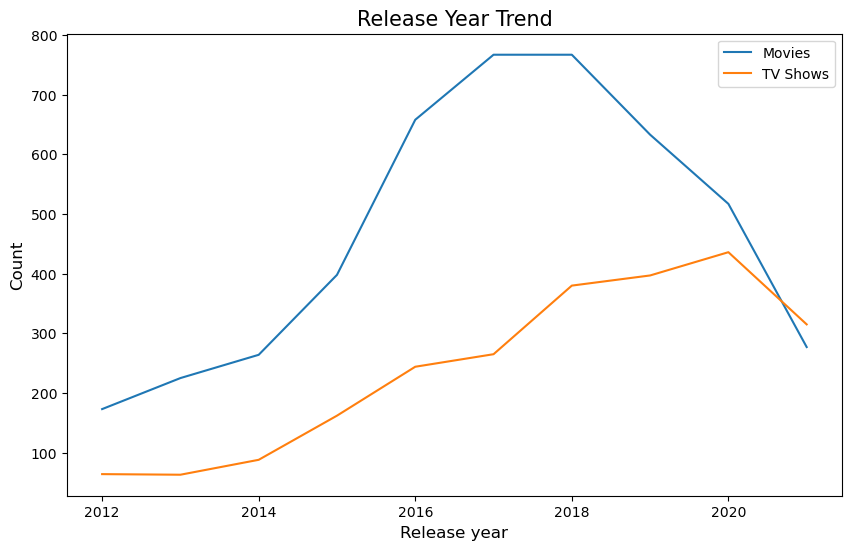

In [64]:
plt.figure(figsize= (10,6))
movies_plot = sns.lineplot(data = ry_movies, x = ry_movies['index'], y = ry_movies["release_year"], label='Movies')
tvshow_plot = sns.lineplot(data = ry_tvshows, x = ry_tvshows['index'], y = ry_tvshows['release_year'], label='TV Shows')
plt.title('Release Year Trend', fontsize = 15)
plt.xlabel('Release year', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.legend()
plt.show()


**Observation:**
<br>
1. There is a increase in the number of Movies and TV shows produced from 2014 to 2018, this might be because of the internet being easily made available for everyone, thus users started using OTT more.
<br>
<br>
2. But after 2019, content produced takes a huge dip, because of the COVID. The entire world was on lockdown, causing production houses to halt their ongoing and upcoming projects.


## 7. Popularity of column: duration 

In [65]:
duration = explode_listedin[explode_listedin['duration'] != "Others"][['show_id','type', 'duration']].drop_duplicates().reset_index(drop = True)


In [66]:
duration['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [67]:
# We need duration in int data type hence we are getting rid of the text data
duration['duration'] = duration['duration'].apply(lambda x:str(x).split()[0])

In [68]:
duration_movies = duration[duration['type']=='Movie'][['show_id', 'duration']]
duration_tvshows = duration[duration['type']=='TV Show'][['show_id', 'duration']]

In [69]:
duration_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   show_id   6131 non-null   object
 1   duration  6131 non-null   object
dtypes: object(2)
memory usage: 143.7+ KB


In [70]:
duration_movies['duration'].value_counts()

90     152
94     146
97     146
93     146
91     144
      ... 
208      1
5        1
16       1
186      1
191      1
Name: duration, Length: 205, dtype: int64

In [71]:
duration_tvshows['duration'].value_counts()

1     1793
2      425
3      199
4       95
5       65
6       33
7       23
8       17
9        9
10       7
13       3
15       2
12       2
11       2
17       1
Name: duration, dtype: int64

In [72]:
duration_movies['duration'] = duration_movies['duration'].astype(int)
duration_tvshows['duration'] = duration_tvshows['duration'].astype(int)

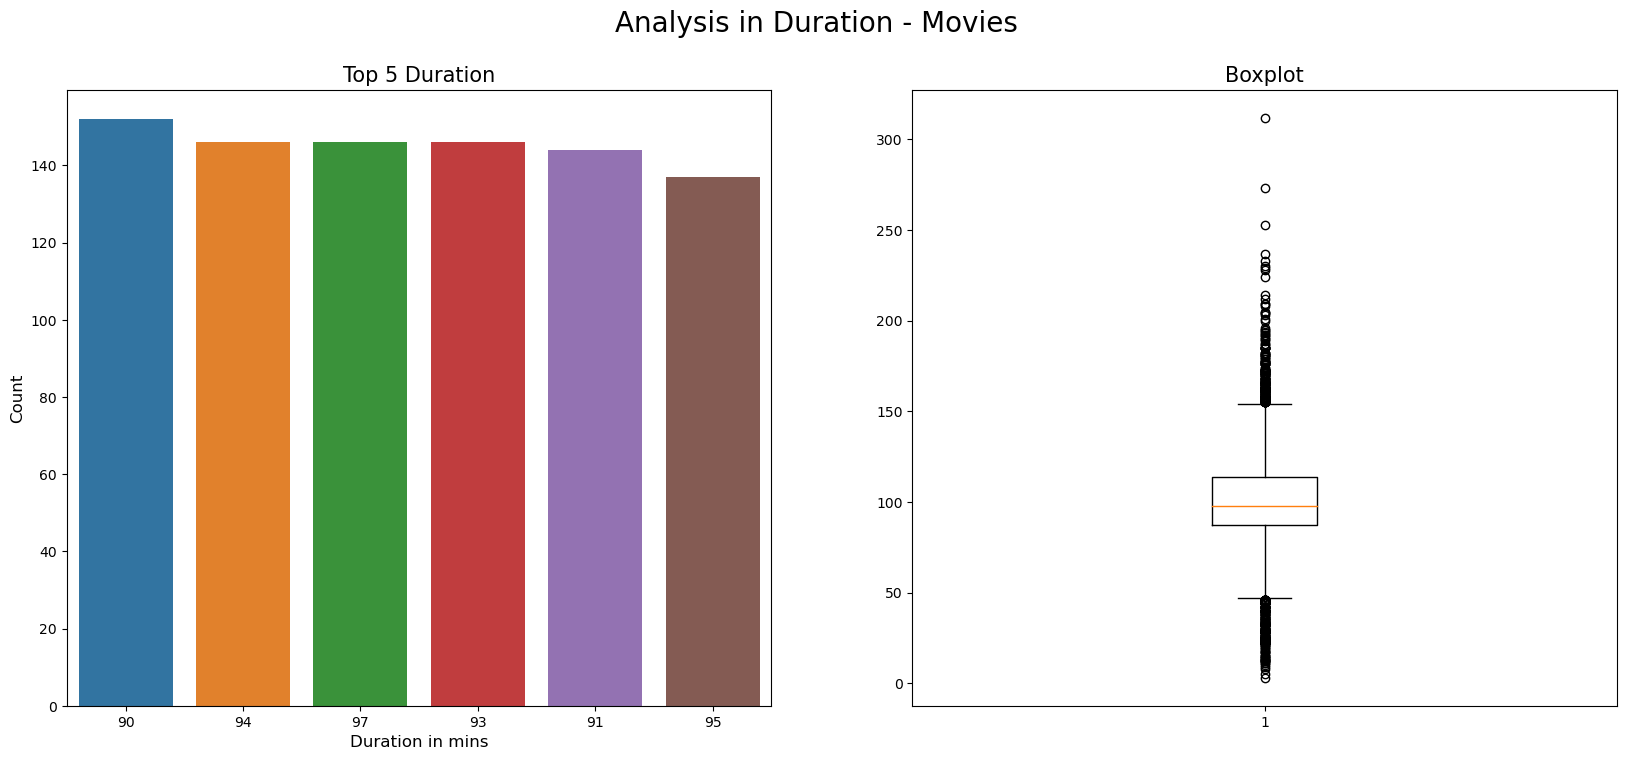

In [73]:
plt.figure(figsize=(20,8)).suptitle('Analysis in Duration - Movies', fontsize = 20)

# countplot - Top 5 duration
plt.subplot(1,2,1)
sns.countplot(data = duration_movies, x='duration', order=duration_movies['duration'].value_counts().index[:6])
plt.title('Top 5 Duration', fontsize = 15)
plt.xlabel('Duration in mins', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# boxplot 
plt.subplot(1,2,2)
plt.boxplot(data = duration_movies, x = duration_movies['duration'])
plt.title('Boxplot', fontsize = 15)

plt.show()

In [74]:
np.percentile(duration_movies['duration'], q = [25, 50, 75])

array([ 87.,  98., 114.])

**Observation:** Most of the popular movies have runtimes between **87 mins** and **114 mins.**

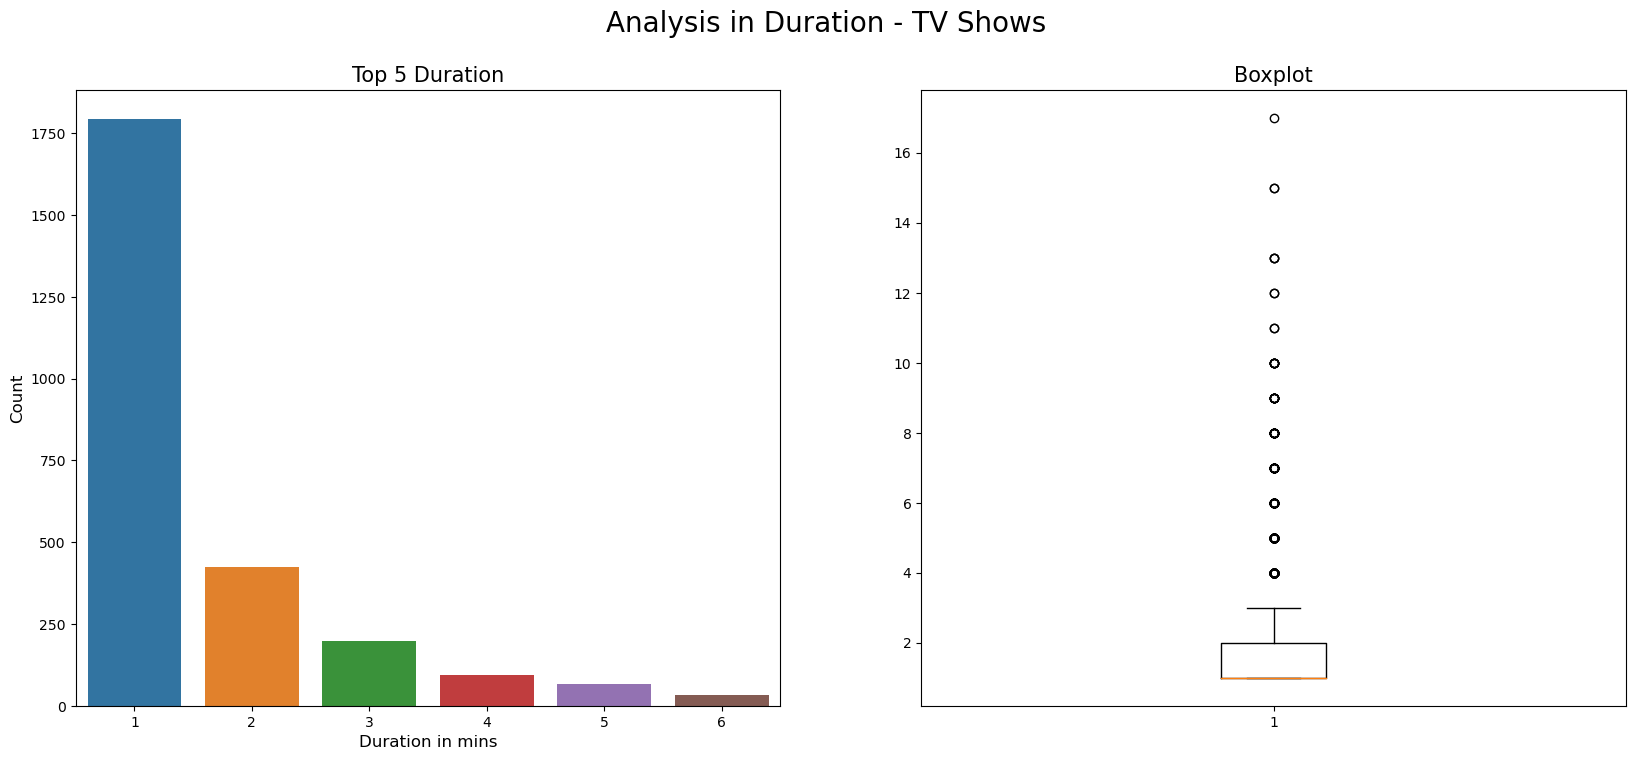

In [75]:
plt.figure(figsize=(20,8)).suptitle('Analysis in Duration - TV Shows', fontsize = 20)

# countplot - Top 5 duration
plt.subplot(1,2,1)
sns.countplot(data = duration_tvshows, x='duration', order=duration_tvshows['duration'].value_counts().index[:6])
plt.title('Top 5 Duration', fontsize = 15)
plt.xlabel('Duration in mins', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# boxplot 
plt.subplot(1,2,2)
plt.boxplot(data = duration_tvshows, x = duration_tvshows['duration'])
plt.title('Boxplot', fontsize = 15)

plt.show()

In [76]:
np.percentile(duration_tvshows['duration'], q = [25, 50, 75])

array([1., 1., 2.])

**Observation:** Most of the popular TV Shows are limited between 1 to 2 seasons

# Overall Observations & Insights

1. Around 69.6% of the contens are movies are 30.4% of the movies are TV Shows. This show **Movies are more popular.**
<br>
<br>
2. Mature audience content rating - **TV-MA is most popular**, followed by TV-14 and TV-PG.
<br>
<br>
3. Top 5 Countries where Movies and TV Shows are popular.
    - United States
    - India
    - Canada
    - France
    - Japan
<br>
<br>
4. In **South Korea and Japan**, TV shows are more popular compared to movies.
<br>
<br>
5. The directors producing popular Movies are
    - Rajiv Chilaka
    - Jan Suter
    - Raul Campos
    <br>
    <br>
6. The directos producing popular TV Shows are
    - Alastair Fothergill
    - Ken Burns
    - Jung-ah Im
    <br>
    <br>
7. Rajiv Chilaka's Chotta Bheem movie series are quite popular among kids in India.
<br>
<br>
8. Top actors based on Movies.
    - Anupam Kher
    - Shah Rukh Khan
    - Naseeruddin Shah
<br>
<br>
9. Top actors based on TV Shows.
    - Takahiro Sakurai
    - Yuki Kaji
    - Daisuke Ono 
<br>
<br>   
10. There is a increase in the number of Movies and TV shows produced from 2014 to 2018, this might be because of the internet being easily made available for everyone, thus users started using OTT more.
<br>
<br>
11. But after 2019, content produced takes a huge dip, because of the COVID. The entire world was on lockdown, causing production houses to halt their ongoing and upcoming projects.
<br>
<br>
12. Most of the popular movies have runtimes between **87 mins** and **114 mins.**
<br>
<br>
13. Most of the popular TV Shows are limited between **1** to **2** seasons.

# Recommendations

1. Since movies are being popular content on Netflix, it is recommended to Netflix, to concentrate on producing more movies.
<br>
<br>
2. TV shows for mature audience(TV-MA) is more propular followed by TV-14 for kids. So it is recommended to produce more content for adults and kids who fall under this category.
<br>
<br>
3. Movies and TV shows from the United States are more popular. Hence Netflix can work with popular American directors to produce more.
<br>
<br>
4. Rajiv Chilaka's Chotta Bheem movie series are quite popular among kids in India. It is recommended that Netflix can work with this director to produce more movies that are popular among kids.
<br>
<br>
5. Netflix can work with well established actors based on the country. As visualized above, there are top 5 actors from top 4 countries. It is more likely that people will be watching movies and TV shows when their actors are in it. So it is recommended to produce more movies with popular Indian actors so that it will be widely popular amomg Indians.
<br>
<br>
6. There is a increase in the number of Movies and TV shows produced from 2014 to 2018, COVID pandemic has affected the movies and TV shows production after 2019. With better production plans, Netflix can again produce popular content.
<br>
<br>
7. It is recommended to limit the runtime of movies between 87 mins and 114 mins.
<br>
<br>
8. It is recommended to limit the runtime of TV shows between 1 and 2 seasons.